In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import statsmodels.formula.api as smf
from sklearn.preprocessing import scale
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
auto = pd.read_csv("C:/Users/Kavita manoj/Downloads/Auto.csv", na_values='?').dropna()
credit = pd.read_csv("C:/Users/Kavita manoj/Downloads/Credit.csv")
adv = pd.read_csv("C:/Users/Kavita manoj/Downloads/Advertising (2).csv")
print(auto.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64


In [3]:
print(credit.isna().sum())

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64


In [4]:
print(adv.isna().sum())

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64


In [5]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


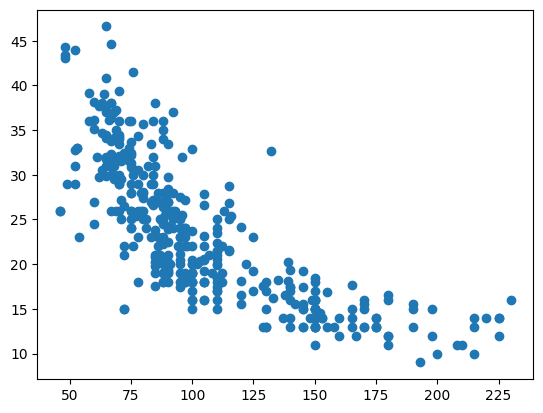

In [6]:
plt.scatter(x=auto.horsepower, y=auto.mpg)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

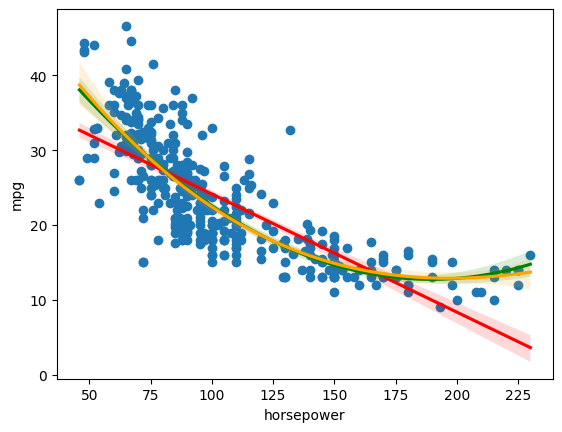

In [7]:
plt.scatter(auto.horsepower, auto.mpg)
sns.regplot(data=auto, x=auto.horsepower, y=auto.mpg, order=1, label='linear', scatter=False, color='red')
sns.regplot(data=auto, x=auto.horsepower, y=auto.mpg, order=2, label='linear', scatter=False, color='green')
sns.regplot(data=auto, x=auto.horsepower, y=auto.mpg, order=3, label='linear', scatter=False, color='orange')

In [8]:
auto['HP_square'] = auto.horsepower**2
auto['HP_cube'] = auto.horsepower**3

In [9]:
auto.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,HP_square,HP_cube
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0,2197000.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0,4492125.0


In [10]:
fit1 = smf.ols('mpg~horsepower', data=auto).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           7.03e-81
Time:                        14:48:26   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
fit2 = smf.ols('mpg~HP_square', data=auto).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           6.23e-62
Time:                        14:48:27   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.4658      0.447     68.219      0.000      29.588      31.344
HP_square     -0.0006   2.83e-05    -20.042      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       25.973   Durbin-Watson:                   0.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.455
Skew:                           0.666   Prob(JB):                     4.02e-07
Kurtosis:                       3.177   Cond. No.                     2.55e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
fit3 = smf.ols('mpg~HP_cube', data=auto).fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     263.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.43e-45
Time:                        14:48:27   Log-Likelihood:                -1260.2
No. Observations:                 392   AIC:                             2524.
Df Residuals:                     390   BIC:                             2532.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.3734      0.390     70.278      0.000      26.608      28.139
HP_cube    -2.359e-06   1.45e-07    -16.216      0.000   -2.65e-06   -2.07e-06
==============================================================================
Omnibus:                       29.712   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.955
Skew:                           0.731   Prob(JB):                     2.57e-08
Kurtosis:                       3.045   Cond. No.                     3.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
fit4 = smf.ols('mpg~horsepower+HP_square', data=auto).fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           5.40e-99
Time:                        14:48:27   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.9001      1.800     31.604      0.000      53.360      60.440
horsepower    -0.4662      0.031    -14.978      0.000      -0.527      -0.405
HP_square      0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
fit5 = smf.ols('mpg~horsepower+HP_square', data=auto).fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           5.40e-99
Time:                        14:48:27   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.9001      1.800     31.604      0.000      53.360      60.440
horsepower    -0.4662      0.031    -14.978      0.000      -0.527      -0.405
HP_square      0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
fit6 = smf.ols('mpg~horsepower+HP_cube', data=auto).fit()
fit6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     421.7
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.94e-98
Time:                        14:48:27   Log-Likelihood:                -1135.2
No. Observations:                 392   AIC:                             2276.
Df Residuals:                     389   BIC:                             2288.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0895      1.304     39.172      0.000      48.525      53.654
horsepower    -0.3128      0.017    -18.629      0.000      -0.346      -0.280
HP_cube     3.026e-06   3.08e-07      9.829      0.000    2.42e-06    3.63e-06
==============================================================================
Omnibus:                       14.778   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.873
Skew:                           0.240   Prob(JB):                     3.97e-06
Kurtosis:                       4.137   Cond. No.                     1.57e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
fit7 = smf.ols('mpg~horsepower+HP_cube+HP_square', data=auto).fit()
fit7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     285.5
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           8.41e-98
Time:                        14:48:27   Log-Likelihood:                -1132.8
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.6848      4.563     13.298      0.000      51.713      69.657
horsepower    -0.5689      0.118     -4.824      0.000      -0.801      -0.337
HP_cube    -2.147e-06   2.38e-06     -0.903      0.367   -6.82e-06    2.53e-06
HP_square      0.0021      0.001      2.193      0.029       0.000       0.004
==============================================================================
Omnibus:                       16.987   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.528
Skew:                           0.204   Prob(JB):                     3.18e-08
Kurtosis:                       4.395   Cond. No.                     5.53e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='radio', ylabel='sales'>

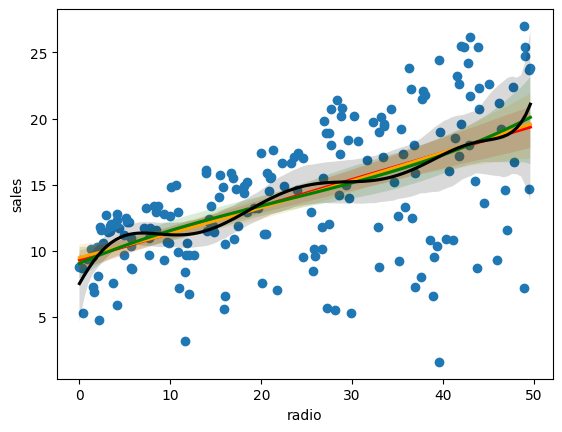

In [17]:
plt.scatter(adv.radio, adv.sales)
sns.regplot(data=adv, x=adv.radio, y=adv.sales, order=1, label='linear', scatter=False, color='red')
sns.regplot(data=adv, x=adv.radio, y=adv.sales, order=2, label='linear', scatter=False, color='orange')
sns.regplot(data=adv, x=adv.radio, y=adv.sales, order=3, label='linear', scatter=False, color='green')
sns.regplot(data=adv, x=adv.radio, y=adv.sales, order=8, label='linear', scatter=False, color='black')

In [18]:
adv['radio_sq'] = adv['radio']**2

In [19]:
adv['radio_fifth'] = adv.radio**5

In [20]:
adv['radio_eighth'] = adv.radio**8

In [21]:
adv.head(2)

,Unnamed: 0,TV,radio,newspaper,sales,radio_sq,radio_fifth,radio_eighth
0,1,230.1,37.8,69.2,22.1,1428.84,7.717187e+07,4.168064e+12
1,2,44.5,39.3,45.1,10.4,1544.49,9.374816e+07,5.690369e+12


In [22]:
fit8 = smf.ols('sales~radio', data=adv).fit()
fit8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           4.35e-19
Time:                        14:48:29   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563     16.542      0.000       8.202      10.422
radio          0.2025      0.020      9.921      0.000       0.162       0.243
==============================================================================
Omnibus:                       19.358   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.910
Skew:                          -0.764   Prob(JB):                     1.75e-05
Kurtosis:                       3.544   Cond. No.                         51.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
fit9 = smf.ols('sales~radio_fifth', data=adv).fit()
fit9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     61.05
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.20e-13
Time:                        14:48:29   Log-Likelihood:                -586.81
No. Observations:                 200   AIC:                             1178.
Df Residuals:                     198   BIC:                             1184.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      12.4475      0.381     32.667      0.000      11.696      13.199
radio_fifth  3.415e-08   4.37e-09      7.813      0.000    2.55e-08    4.28e-08
==============================================================================
Omnibus:                        2.800   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                2.668
Skew:                          -0.283   Prob(JB):                        0.263
Kurtosis:                       2.989   Cond. No.                     1.03e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
fit10 = smf.ols('sales~radio_sq', data=adv).fit()
fit10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     91.22
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           5.09e-18
Time:                        14:48:29   Log-Likelihood:                -575.80
No. Observations:                 200   AIC:                             1156.
Df Residuals:                     198   BIC:                             1162.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9938      0.441     24.947      0.000      10.125      11.863
radio_sq       0.0040      0.000      9.551      0.000       0.003       0.005
==============================================================================
Omnibus:                       16.363   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.858
Skew:                          -0.698   Prob(JB):                     0.000132
Kurtosis:                       3.443   Cond. No.                     1.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
fit11 = smf.ols("sales~radio+radio_eighth+radio_sq", data=adv).fit()
fit11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     32.81
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           3.14e-17
Time:                        14:48:29   Log-Likelihood:                -572.99
No. Observations:                 200   AIC:                             1154.
Df Residuals:                     196   BIC:                             1167.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.1940      0.891     10.321      0.000       7.437      10.951
radio            0.2388      0.112      2.128      0.035       0.017       0.460
radio_eighth  7.219e-14   9.49e-14      0.761      0.448   -1.15e-13    2.59e-13
radio_sq        -0.0013      0.003     -0.457      0.648      -0.007       0.004
==============================================================================
Omnibus:                       18.855   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.216
Skew:                          -0.750   Prob(JB):                     2.47e-05
Kurtosis:                       3.543   Cond. No.                     2.57e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
table = sm.stats.anova_lm(fit8, fit9)
print(table)

   df_resid          ssr  df_diff     ss_diff    F  Pr(>F)
0     198.0  3618.479549      0.0         NaN  NaN     NaN
1     198.0  4140.552943     -0.0 -522.073394  inf     NaN


In [27]:
fit12 = smf.ols("sales~radio+I(radio**9)", data = adv).fit()

In [28]:
fit13 = smf.ols("sales~radio+I(radio**2)", data=adv).fit()


In [29]:
table2 = sm.stats.anova_lm(fit12, fit13)
print(table2)

   df_resid          ssr  df_diff   ss_diff    F  Pr(>F)
0     197.0  3609.399516      0.0       NaN  NaN     NaN
1     197.0  3616.769190     -0.0 -7.369674  inf     NaN


In [30]:
fit14 = smf.ols("sales~radio",data=adv).fit()

table3 = sm.stats.anova_lm(fit14, fit13)
print(table3)

   df_resid          ssr  df_diff   ss_diff         F    Pr(>F)
0     198.0  3618.479549      0.0       NaN       NaN       NaN
1     197.0  3616.769190      1.0  1.710359  0.093161  0.760519


In [31]:
#methods
"""
1. sns graph; y with x, y with x**2
2. Adj R2 is high, R2, p values significant
3. variables are non linear, parameters are NOT exponential"""

'\n1. sns graph; y with x, y with x**2\n2. Adj R2 is high, R2, p values significant\n3. variables are non linear, parameters are NOT exponential'

In [32]:
mpg_prd = fit1.predict(auto.horsepower)
mpg_prd

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64

In [33]:
plt.scatter(x=mpg_prd, y=auto.horsepower)

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [ ]:
fitAuto1  = smf.ols('mpg~horsepower', data=auto).fit()
fitAuto1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           7.03e-81
Time:                        11:27:30   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
fitAuto2 = smf.ols('mpg~horsepower+I(horsepower**2)', data=auto).fit()
fitAuto2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Wed, 15 Mar 2023   Prob (F-statistic):           5.40e-99
Time:                        11:27:50   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
tableAuto1 = sm.stats.anova_lm(fitAuto1, fitAuto2)
print(tableAuto1)

   df_resid          ssr  df_diff     ss_diff           F        Pr(>F)
0     390.0  9385.915872      0.0         NaN         NaN           NaN
1     389.0  7442.029412      1.0  1943.88646  101.608283  2.196340e-21


In [ ]:
mpg_prd1 = fitAuto1.predict(auto.horsepower)
print(mpg_prd1)

None   NaN
dtype: float64


ValueError: x and y must be the same size

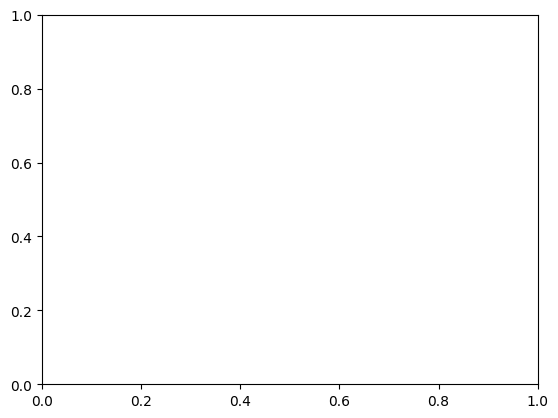

In [ ]:
plt.scatter(auto.horsepower, mpg_prd1)